# Detecting the difficulty level of French texts




In [1]:
%%capture
!python -m spacy download fr_core_news_sm

In [4]:
import pandas as pd
import numpy as np

In [5]:
train_data = pd.read_csv('training_data.csv', index_col = 'id')


In [6]:
train_data.head()

,sentence,difficulty
id,,
0,Les coûts kilométriques réels peuvent diverger...,C1
1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,Le test de niveau en français est sur le site ...,A1
3,Est-ce que ton mari est aussi de Boston?,A1
4,"Dans les écoles de commerce, dans les couloirs...",B1


In [7]:
train_data.isnull().sum()

sentence      0
difficulty    0
dtype: int64

In [8]:
train_data.duplicated().sum()

0

In [9]:
X_data = train_data['sentence']

In [10]:
y_data = train_data['difficulty']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [13]:
y_train.shape[0]

3840

In [14]:
X_train.shape[0]

3840

In [16]:
import spacy
from spacy import displacy
import string
from nltk.stem.snowball import SnowballStemmer

In [17]:
#french language
french = spacy.load('fr_core_news_sm')
stemmer = SnowballStemmer(language='french')

In [18]:
test = "Bouygues a eu 1 coupure de réseau à Marseille."
test2 = "Par ailleurs, 42 % des adolescents déclarent qu'ils seraient dévastés s'ils devaient "

In [19]:
def spacy_tokenizer(sentence):

    punctuations = string.punctuation
    stop_words = spacy.lang.fr.stop_words.STOP_WORDS

    # Create token object, which is used to create documents with linguistic annotations.
    mytokens = french(sentence)

    # Remove proper nouns (noms propres)
    mytokens = [word for word in mytokens if word.pos_ != "PROPN"]

    # Lemmatize each token and convert each token into lowercase
    mytokens = [stemmer.stem(X.text) for X in mytokens]

    # Remove numbers
    mytokens = [word for word in mytokens if not word.isdigit()]

    # Remove stop words and punctuation
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]
    
    # Return preprocessed list of tokens
    return list(mytokens)

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [22]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.preprocessing import StandardScaler


pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression()),
])

# Ajustez le modèle sur l'ensemble d'entraînement
pipe.fit(X_train, y_train)


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression())])

In [23]:
y_pred = pipe.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [25]:
print(f'The accuracy using TF-IDF and Logistic Regression is: {round(accuracy_score(y_test, y_pred), 3)}')
print(f'\nThe precision using TF-IDF and Logistic Regression is: {round(precision_score(y_test, y_pred,average="macro"), 3)}')
print(f'\nThe recall using TF-IDF and Logistic Regression is: {round(recall_score(y_test, y_pred,average="macro"), 3)}')
print(f'\nThe F1-score using TF-IDF and Logistic Regression is: {round(f1_score(y_test, y_pred,average="macro"), 3)}')


The accuracy using TF-IDF and Logistic Regression is: 0.451

The precision using TF-IDF and Logistic Regression is: 0.443

The recall using TF-IDF and Logistic Regression is: 0.449

The F1-score using TF-IDF and Logistic Regression is: 0.442


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

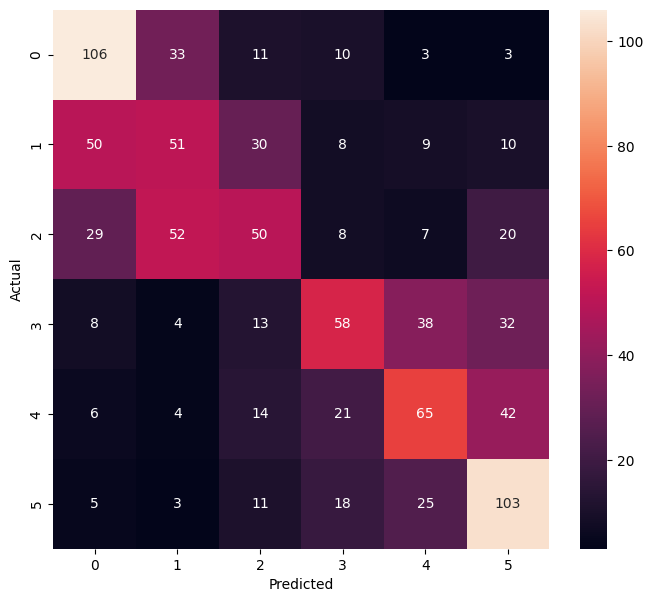

In [27]:
## Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,7))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Training on Full Data set


In [28]:
X_full = pd.concat([X_train, X_test], axis=0)
y_full = pd.concat([y_train, y_test], axis=0)

In [29]:
pipe.fit(X_full, y_full)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression())])

# Test Data

In [30]:
df_pred = pd.read_csv('unlabelled_test_data.csv', index_col = 'id')
df_pred.head()

,sentence
id,
0,Nous dûmes nous excuser des propos que nous eû...
1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,"Et, paradoxalement, boire froid n'est pas la b..."
3,"Ce n'est pas étonnant, car c'est une saison my..."
4,"Le corps de Golo lui-même, d'une essence aussi..."


In [31]:
df_pred['difficulty'] = pipe.predict(df_pred["sentence"])
predictions = df_pred.drop(columns=['sentence'], inplace = False)

predictions.to_csv('submission.csv')

In [32]:
predictions.head(2)

,difficulty
id,
0,C2
1,A2


In [33]:
df_pred = pd.read_csv('unlabelled_test_data.csv', index_col = 'id')
df_pred.head()

,sentence
id,
0,Nous dûmes nous excuser des propos que nous eû...
1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,"Et, paradoxalement, boire froid n'est pas la b..."
3,"Ce n'est pas étonnant, car c'est une saison my..."
4,"Le corps de Golo lui-même, d'une essence aussi..."


In [34]:
df_pred['difficulty'] = pipe.predict(df_pred["sentence"])
predictions = df_pred.drop(columns=['sentence'], inplace = False)

predictions.to_csv('submission.csv')

In [35]:
predictions.head(2)

,difficulty
id,
0,C2
1,A2


In [60]:

! kaggle competitions submit -c detecting-french-texts-difficulty-level-2023 -f submission.csv -m "Sample submission"

Successfully submitted to Detecting the difficulty level of French texts



  0%|          | 0.00/9.48k [00:00<?, ?B/s]
100%|██████████| 9.48k/9.48k [00:00<00:00, 13.7kB/s]
